In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

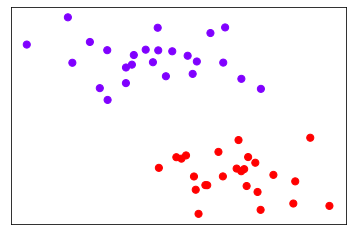

In [6]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

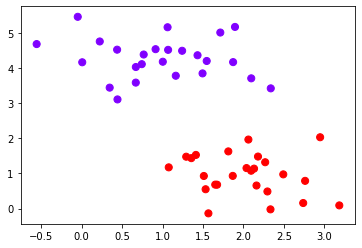

In [8]:
# 画决策边界：函数contour
# - matplot.axes.Axes.coutour([X,Y]Z,[levels],**kwargs)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前子图，不存在则创建新的子图


In [26]:
# 制作网格meshgrid

# 获取平面两条坐标轴上的最大值和最小值
xlim = ax.get_xlim() 
ylim = ax.get_ylim()

# 在最大值和最小值之间形成20个规律数据
axisx = np.linspace(xlim[0],xlim[1],20)
axisy = np.linspace(ylim[0],ylim[1],20)

axisy, axisx = np.meshgrid(axisy, axisx)
# meshgrid函数将两个一维数组变为以其为特征的二维矩阵

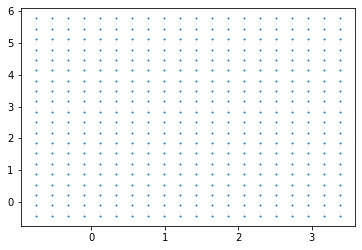

In [28]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
# vstack将多个结构一致的一维数组按行堆叠
# ravel()降维
# xy为已形成的网络，为遍布在整个画布上密集的点
xy.shape
plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow')

In [29]:
# 网格上的点到决策边界的距离
# 建模
clf = SVC(kernel='linear').fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
# decision_function输出样本点到决策边界的距离
# 返回结构，由于contour函数的Z要求于X和Y一致

In [30]:
Z.shape

(20, 20)

/home/esterl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'color'
  import sys


(-0.43660961990940284, 5.772756283035797)

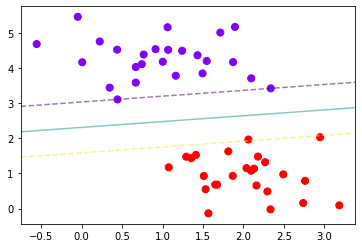

In [32]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前子图，不存在则创建新的子图
ax.contour(axisx,axisy,Z
          ,color = 'k'
          ,levels = [-1,0,1]  # 将离边界距离为1，0，-1的点连成3条线
          ,alpha=0.5
          , linestyles=['--','-','--']
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [135]:
def plot_decision_function(model, ax=None):
    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    axisx = np.linspace(xlim[0],xlim[1],30)
    axisy = np.linspace(ylim[0],ylim[1],30)
    
    axisx,axisy = np.meshgrid(axisx, axisy)
    
    xy = np.vstack([axisx.ravel(),axisy.ravel()]).T
    
    Z = model.decision_function(xy).reshape(axisx.shape)
    
    ax.contour(axisx,axisy,Z
              ,colors = 'b'
              , levels = ['-1','0','1']
               , linestyles = ['--','-','--']
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

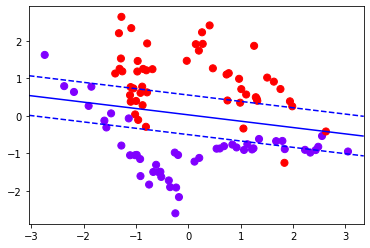

In [136]:
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
plot_decision_function(clf)

In [40]:
# 探索模型
clf.predict(X)
# 根据决策边界，对样本进行分类，返回n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [41]:
clf.score(X,y)
# 返回平均准确度

1.0

In [43]:
clf.support_vectors_
# 返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [48]:
clf.n_support_
# 返回每个类中对应的支持向量个数

array([2, 1], dtype=int32)

In [ ]:
# 非线性情况呢？比如环形数据

In [49]:
from sklearn.datasets import make_circles

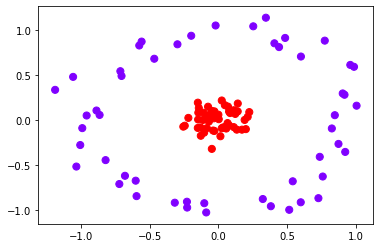

In [54]:
X,y = make_circles(100,factor=0.1, noise=.1)
X.shape
y.shape
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plt.show()

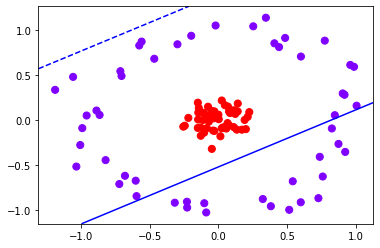

In [55]:
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
plot_decision_function(clf)

In [56]:
clf.score(X,y)

0.66

> 如何解决上述非线性的情况？
增加一个新维度来

In [58]:
r = np.exp(-(X**2).sum(1))
r.shape

(100,)

In [64]:
rlim = np.linspace(min(r),max(r),100)
rlim.shape

(100,)

In [67]:
from mpl_toolkits import mplot3d

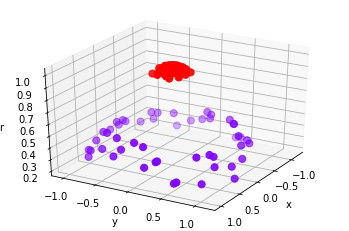

In [72]:
# 绘制三维图像的函数
# elev 上下旋转的角度
# azim 平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')    
    ax.set_zlabel('r')
    plt.show()
plot_3D()

In [2]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90,120],azim=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

NameError: name 'plot_3D' is not defined

## 非线性SVM与核函数
将原始数据升维到特征空间后使其线性可分，但变换函数$pai$可能计算开销大。确定核函数

重要参数：kernel参数列表


/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


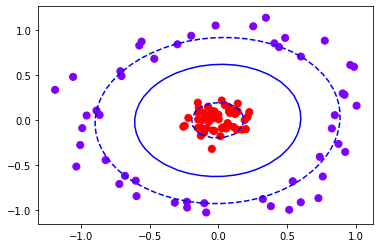

In [74]:
clf = SVC(kernel='rbf').fit(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='rainbow')
plot_decision_function(clf)

## how to choose核函数 in SVM？
not discussed that much

In [3]:
from sklearn.datasets import make_moons,make_classification,make_blobs,make_circles
from matplotlib.colors import ListedColormap

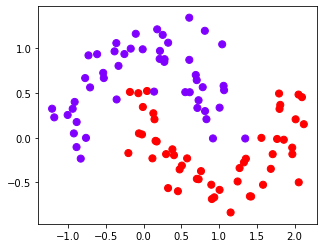

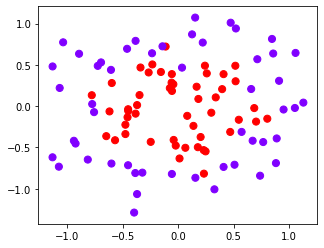

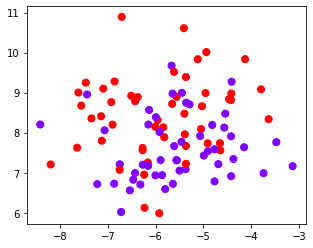

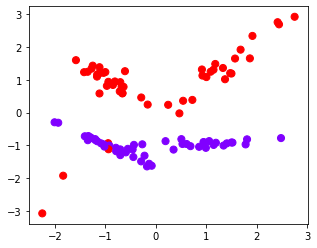

In [6]:
n_samples = 100
datasets = [ 
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features=2, n_informative=2,n_redundant=0)
]

Kernel = ['linear','poly','sigmoid','rbf']

for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='rainbow')

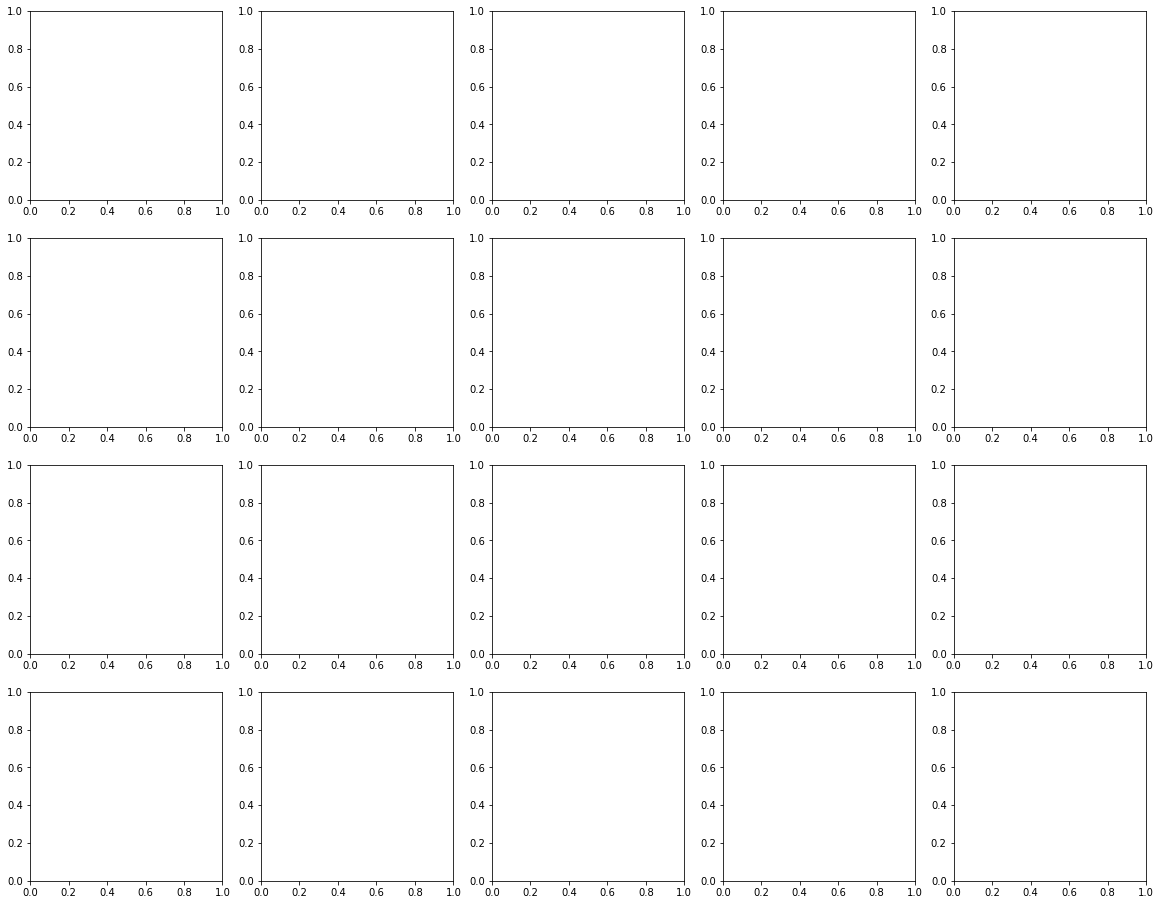

In [7]:
nrows = len(datasets)
ncols = len(Kernel) + 1

# fig, axes = plt.subplots(nrows, ncols, figsize=(20,16))
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16)) 

In [8]:
# 惰性对象的打开方式 
# enumerate, map, zip
[*enumerate(datasets)] == list(enumerate(datasets))
#index,(X,y)= [(index, array([特征矩阵X],[标签Y]))]

True

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/esterl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


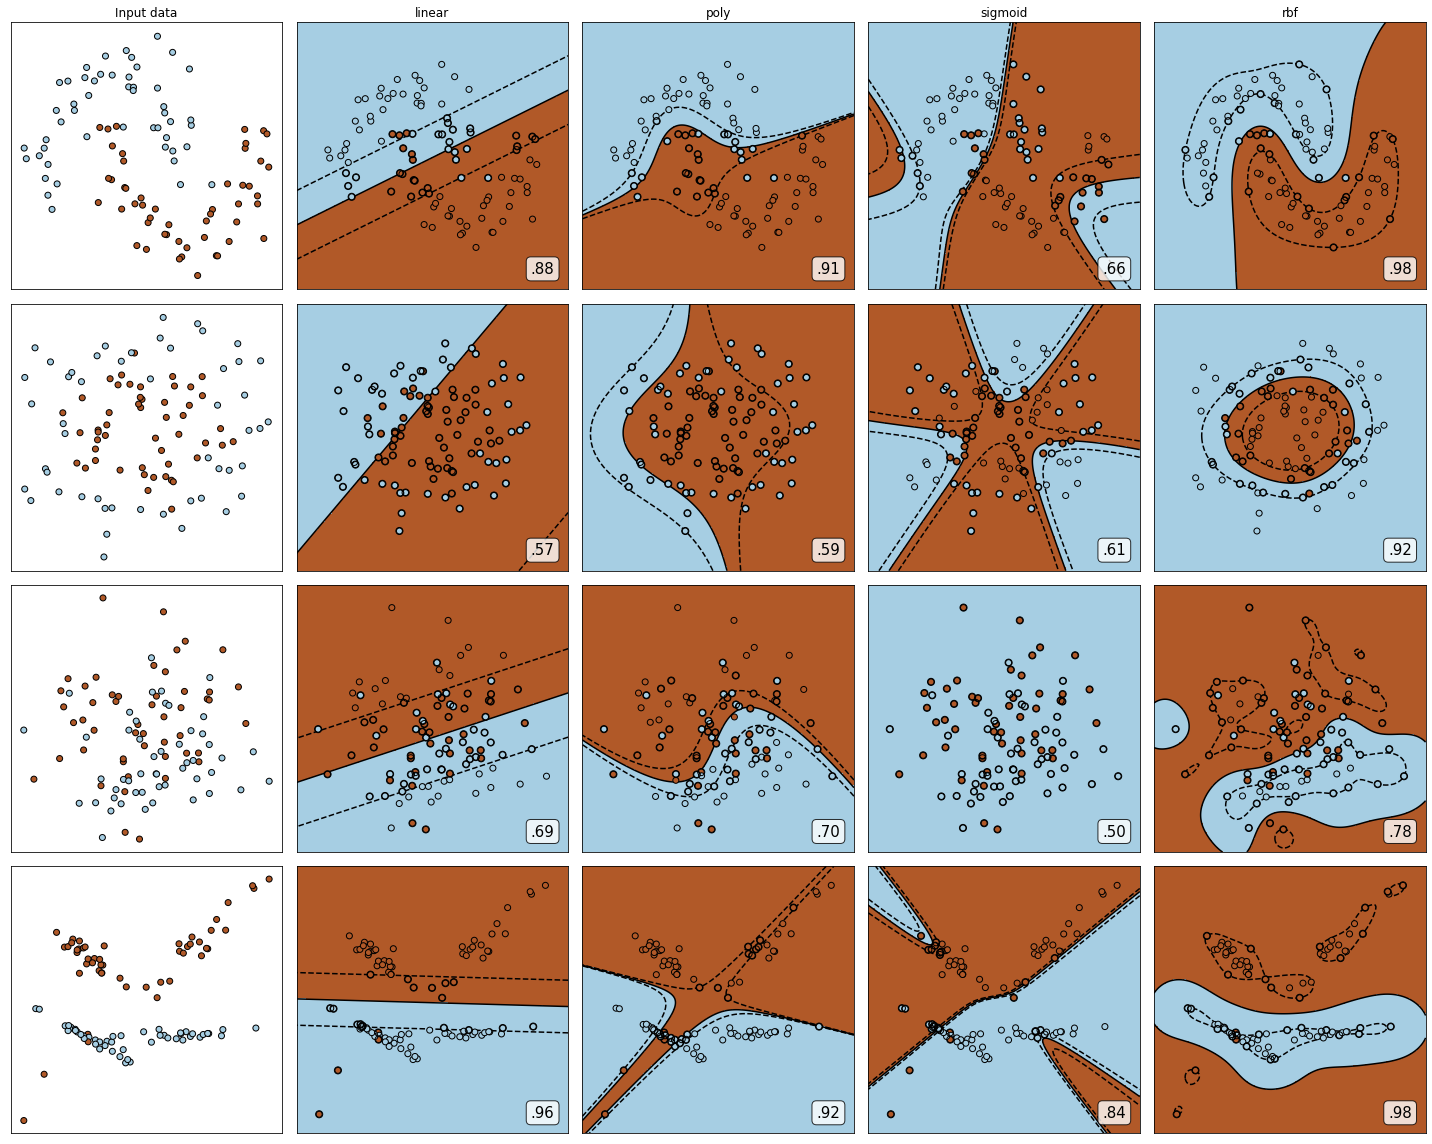

In [13]:
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 16)) 
for ds_cnt, (X,y) in enumerate(datasets):
    # 第一列中放原始数据分布
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title('Input data')
    ax.scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())# 不显示标尺
    
    # 从图像第二列开始 一个个填充分类结果
    for est_idx, k in enumerate(Kernel):
        ax = axes[ds_cnt, est_idx+1]
        clf = SVC(kernel=k,gamma=2).fit(X,y)
        score = clf.score(X,y) #对训练效果打分
        
        # 绘制本身散点图
        ax.scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
        
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=50,
                  facecolors='none', zorder=10,edgecolors='k')
        
        # 绘制决策边界
        x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
        y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
        
        # np.mgrid代替np.linspace&np.meshgrid
        # [起始值：结束值：步长]
        # 为复数是，表示步数
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        # np.c_
        Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
        
        # 填充等高线不同区域的颜色
        ax.pcolormesh(XX,YY, Z >0, cmap=plt.cm.Paired)
        
#         绘制等高线
        ax.contour(XX,YY,Z
                   ,colors = ['k','k','k']
                   ,linestyles=['--','-','--']
                   ,levels = [-1,0,1]
                 )
        ax.set_xticks(())
        ax.set_yticks(())
        
        # 放在第一行的顶端
        if ds_cnt == 0:
            ax.set_title(k)
            
        # 为每张图添加分数
        ax.text(0.95,0.06, ('%.2f'%score).lstrip('0')
               ,size=15
                , bbox=dict(boxstyle='round',alpha=0.8,facecolor='white')
                # 为分类添加格子
                , transform=ax.transAxes
                , horizontalalignment='right' # 位于坐标轴的方向
               )
        
plt.tight_layout()
plt.show()       
        

## 乳腺癌数据集上探索核函数
实际中往往不是事先知道数据分布

In [ ]:
from sklearn.datasets import load_breast_cancer
from s

### 软间隔
>defination: 硬间隔和软间隔
当两组数据是完全线性可分，存在一个决策边界是训练集上的分类误差为0，这两种数据被称为存在“硬间隔”。当两组数据几乎是完全线性可分的，但决策边界在训练集上存在较小的训练误差，这种被称为“软间隔”

最大margin和被分错的样本数量的平衡->松弛系数$\theta$

进一步松弛系数造成的被分错的样本数量增大，应该加上惩罚项来对松弛系数进行限制。

后续一系列的拉格朗日函数、拉格郎日对偶问题实质没有改变，只是拉格朗日乘子$\alpha \leq C$, C为控制惩罚力度的系数。

系数C：0开始，1为比较好；噪声较多时，减少C

In [6]:
score = []
C_range = np.linspace(0.01,30,50)
C_range.shape

(50,)